# Prerequisites

In [54]:
from google.colab import drive
import os
import pandas as pd
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import json
import pickle
from tensorflow.keras.models import load_model

In [2]:
# Mounting Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploring dataset

## Getting healthy images info

In [ ]:
# Defining variables
healthy_imgs_path = 'drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/healthy'
healthy_imgs_paths = []
healthy_category = []
healthy_imgs_dimensions = []

# Reading healthy images and saving their information
for filepath in os.listdir(healthy_imgs_path):
  healthy_img_path = os.path.join(healthy_imgs_path, filepath)
  healthy_imgs_paths.append(healthy_img_path)
  healthy_category.append('healthy')
  healthy_img = cv2.imread(healthy_img_path)
  healthy_imgs_dimensions.append(healthy_img.shape)

df_healthy = pd.DataFrame({'Filepath': healthy_imgs_paths, 'Dimension': healthy_imgs_dimensions, 'Category': healthy_category})
df_healthy

,Filepath,Dimension,Category
0,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy
1,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy
2,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy
3,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy
4,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy
...,...,...,...
1012,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy
1013,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy
1014,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy
1015,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy


In [ ]:
# Checking healthy images dimensions to see if all of them have the same dimensions
df_healthy['Dimension'].value_counts()

(256, 256, 3)    1017
Name: Dimension, dtype: int64

In [ ]:
# Saving healthy dataframe as CSV
df_healthy.to_csv('grape_healthy_full.csv', index=False)

## Getting esca images info

In [ ]:
# Defining variables
esca_imgs_path = 'drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/esca'
esca_imgs_paths = []
esca_category = []
esca_imgs_dimensions = []

# Reading esca images and saving their information
for filepath in os.listdir(esca_imgs_path):
  esca_img_path = os.path.join(esca_imgs_path, filepath)
  esca_imgs_paths.append(esca_img_path)
  esca_category.append('esca')
  esca_img = cv2.imread(esca_img_path)
  esca_imgs_dimensions.append(esca_img.shape)

df_esca = pd.DataFrame({'Filepath': esca_imgs_paths, 'Dimension': esca_imgs_dimensions, 'Category': esca_category})
df_esca

,Filepath,Dimension,Category
0,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca
1,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca
2,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca
3,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca
4,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca
...,...,...,...
13279,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca
13280,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca
13281,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca
13282,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca


In [ ]:
# Checking esca images dimensions to see if all of them have the same dimensions
df_esca['Dimension'].value_counts()

(256, 256, 3)    13284
Name: Dimension, dtype: int64

In [ ]:
# Saving esca dataframe as CSV
df_esca.to_csv('grape_esca_full.csv', index=False)

## Getting black rot images info

In [ ]:
# Defining variables
black_rot_imgs_path = 'drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/black_rot'
black_rot_imgs_paths = []
black_rot_category = []
black_rot_imgs_dimensions = []

# Reading black rot images and saving their information
for filepath in os.listdir(black_rot_imgs_path):
  black_rot_img_path = os.path.join(black_rot_imgs_path, filepath)
  black_rot_imgs_paths.append(black_rot_img_path)
  black_rot_category.append('black_rot')
  black_rot_img = cv2.imread(black_rot_img_path)
  black_rot_imgs_dimensions.append(black_rot_img.shape)

df_black_rot = pd.DataFrame({'Filepath': black_rot_imgs_paths, 'Dimension': black_rot_imgs_dimensions, 'Category': black_rot_category})
df_black_rot

,Filepath,Dimension,Category
0,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot
1,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot
2,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot
3,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot
4,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot
...,...,...,...
11323,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot
11324,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot
11325,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot
11326,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot


In [ ]:
# Checking black rot images dimensions to see if all of them have the same dimensions
df_black_rot['Dimension'].value_counts()

(256, 256, 3)    11328
Name: Dimension, dtype: int64

In [ ]:
# Saving black rot dataframe as CSV
df_black_rot.to_csv('grape_black_rot_full.csv', index=False)

## Getting isariopsis images info

In [ ]:
# Defining variables
isariopsis_imgs_path = 'drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/isariopsis'
isariopsis_imgs_paths = []
isariopsis_category = []
isariopsis_imgs_dimensions = []

# Reading isariopsis images and saving their information
for filepath in os.listdir(isariopsis_imgs_path):
  isariopsis_img_path = os.path.join(isariopsis_imgs_path, filepath)
  isariopsis_imgs_paths.append(isariopsis_img_path)
  isariopsis_category.append('isariopsis')
  isariopsis_img = cv2.imread(isariopsis_img_path)
  isariopsis_imgs_dimensions.append(isariopsis_img.shape)

df_isariopsis = pd.DataFrame({'Filepath': isariopsis_imgs_paths, 'Dimension': isariopsis_imgs_dimensions, 'Category': isariopsis_category})
df_isariopsis

,Filepath,Dimension,Category
0,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis
1,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis
2,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis
3,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis
4,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis
...,...,...,...
10327,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis
10328,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis
10329,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis
10330,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis


In [ ]:
# Checking isariopsis images dimensions to see if all of them have the same dimensions
df_isariopsis['Dimension'].value_counts()

(256, 256, 3)    10332
Name: Dimension, dtype: int64

In [ ]:
# Saving isariopsis dataframe as CSV
df_isariopsis.to_csv('grape_isariopsis_full.csv', index=False)

## Exploring dataset findings
*   All categories except "healthy" have more than 10k images.
*   All images have a dimension of 256x256 and are color images.

Let's try a model with 1k images per category and see the results we obtain. In case of get bad results we will need to augment "healthy" category images.


# Load original CSVs
Avoiding read and information extraction from all images by loading CSVs

In [ ]:
# Loading original CSVs into dataframes
df_healthy_from_csv = pd.read_csv('grape_healthy_full.csv')
df_esca_from_csv = pd.read_csv('grape_esca_full.csv')
df_black_rot_from_csv = pd.read_csv('grape_black_rot_full.csv')
df_isariopsis_from_csv = pd.read_csv('grape_isariopsis_full.csv')

In [ ]:
df_healthy.loc[0, 'Dimension']

(256, 256, 3)

In [ ]:
df_healthy_from_csv.loc[0, 'Dimension']

'(256, 256, 3)'

Los dataframes cargados son idénticos pero la tupla de la columna 'Dimensión' se cargan como string en vez de como tupla (dataframe original). Si lo convertimos podemos ver que los dataframes son idénticos.

In [ ]:
# Checking if the dataframes with healthy images info is equals to the original
df_healthy_copia = df_healthy.copy()
df_healthy_copia['Dimension'] = df_healthy_copia['Dimension'].astype(str)
healthy_equal = df_healthy_from_csv.equals(df_healthy_copia)
print(healthy_equal)

True


In [ ]:
# Checking if the dataframes with esca images info is equals to the original
df_esca_copia = df_esca.copy()
df_esca_copia['Dimension'] = df_esca_copia['Dimension'].astype(str)
esca_equal = df_esca_from_csv.equals(df_esca_copia)
print(esca_equal)

True


In [ ]:
# Checking if the dataframes with black rot images info is equals to the original
df_black_rot_copia = df_black_rot.copy()
df_black_rot_copia['Dimension'] = df_black_rot_copia['Dimension'].astype(str)
black_rot_equal = df_black_rot_from_csv.equals(df_black_rot_copia)
print(black_rot_equal)

True


In [ ]:
# Checking if the dataframes with isariopsis images info is equals to the original
df_isariopsis_copia = df_isariopsis.copy()
df_isariopsis_copia['Dimension'] = df_isariopsis_copia['Dimension'].astype(str)
isariopsis_equal = df_isariopsis_from_csv.equals(df_isariopsis_copia)
print(isariopsis_equal)

True


# Getting 1k samples per dataframe and assigning samples to partitions

In [ ]:
# Defining data partition dimensions
total_rows = 1000
train_rows = int(total_rows * 0.7)
validation_rows = int(total_rows * 0.2)
test_rows = total_rows - train_rows - validation_rows

## Healthy

In [ ]:
# Getting 1k of healthy samples of the original dataframe
df_healthy_1k = df_healthy.sample(n=total_rows, random_state=33).reset_index(drop=True)

# Adding category tag and partition row to 1k healthy dataframe
df_healthy_1k['Category_tag'] = 0
df_healthy_1k['Partition'] = np.array(['train'] * train_rows + ['validation'] * validation_rows + ['test'] * test_rows)
df_healthy_1k

,Filepath,Dimension,Category,Category_tag,Partition
0,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,train
1,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,train
2,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,train
3,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,train
4,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,train
...,...,...,...,...,...
995,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,test
996,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,test
997,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,test
998,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,test


In [ ]:
# Checking data partitions dimensions
df_healthy_1k['Partition'].value_counts()

train         700
validation    200
test          100
Name: Partition, dtype: int64

## ESCA

In [ ]:
# Getting 1k of esca samples of the original dataframe
df_esca_1k = df_esca.sample(n=total_rows, random_state=33).reset_index(drop=True)

# Adding category tag and partition row to 1k esca dataframe
df_esca_1k['Category_tag'] = 1
df_esca_1k['Partition'] = np.array(['train'] * train_rows + ['validation'] * validation_rows + ['test'] * test_rows)
df_esca_1k

,Filepath,Dimension,Category,Category_tag,Partition
0,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca,1,train
1,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca,1,train
2,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca,1,train
3,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca,1,train
4,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca,1,train
...,...,...,...,...,...
995,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca,1,test
996,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca,1,test
997,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca,1,test
998,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca,1,test


In [ ]:
# Checking data partitions dimensions
df_esca_1k['Partition'].value_counts()

train         700
validation    200
test          100
Name: Partition, dtype: int64

## Black rot

In [ ]:
# Getting 1k of esca samples of the original dataframe
df_black_rot_1k = df_black_rot.sample(n=total_rows, random_state=33).reset_index(drop=True)

# Adding category tag and partition row to 1k black rot dataframe
df_black_rot_1k['Category_tag'] = 2
df_black_rot_1k['Partition'] = np.array(['train'] * train_rows + ['validation'] * validation_rows + ['test'] * test_rows)
df_black_rot_1k

,Filepath,Dimension,Category,Category_tag,Partition
0,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot,2,train
1,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot,2,train
2,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot,2,train
3,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot,2,train
4,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot,2,train
...,...,...,...,...,...
995,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot,2,test
996,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot,2,test
997,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot,2,test
998,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot,2,test


In [ ]:
# Checking data partitions dimensions
df_black_rot_1k['Partition'].value_counts()

train         700
validation    200
test          100
Name: Partition, dtype: int64

## Isariopsis

In [ ]:
# Getting 1k of esca samples of the original dataframe
df_isariopsis_1k = df_isariopsis.sample(n=total_rows, random_state=33).reset_index(drop=True)

# Adding category tag and partition row to 1k isariopsis dataframe
df_isariopsis_1k['Category_tag'] = 3
df_isariopsis_1k['Partition'] = np.array(['train'] * train_rows + ['validation'] * validation_rows + ['test'] * test_rows)
df_isariopsis_1k

,Filepath,Dimension,Category,Category_tag,Partition
0,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,train
1,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,train
2,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,train
3,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,train
4,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,train
...,...,...,...,...,...
995,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,test
996,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,test
997,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,test
998,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,test


In [ ]:
# Checking data partitions dimensions
df_isariopsis_1k['Partition'].value_counts()

train         700
validation    200
test          100
Name: Partition, dtype: int64

## Saving 1k dataframes as CSVs

In [ ]:
# Saving all 1k samples dataframes as CSVs
df_healthy_1k.to_csv('grape_healthy_1k.csv', index=False)
df_esca_1k.to_csv('grape_esca_1k.csv', index=False)
df_black_rot_1k.to_csv('grape_black_rot_1k.csv', index=False)
df_isariopsis_1k.to_csv('grape_isariopsis_1k.csv', index=False)

# Load 1k CSVs

In [3]:
# Loading original CSVs into dataframes
df_healthy_1k = pd.read_csv('grape_healthy_1k.csv')
df_esca_1k = pd.read_csv('grape_esca_1k.csv')
df_black_rot_1k = pd.read_csv('grape_black_rot_1k.csv')
df_isariopsis_1k = pd.read_csv('grape_isariopsis_1k.csv')

# Preparing data for model training

## Creating dataframes by partitions

In [4]:
# Creating train dataframe and shuffling
df_train = pd.concat([df_healthy_1k[df_healthy_1k['Partition'] == 'train'], df_esca_1k[df_esca_1k['Partition'] == 'train'], df_black_rot_1k[df_black_rot_1k['Partition'] == 'train'], df_isariopsis_1k[df_isariopsis_1k['Partition'] == 'train']], ignore_index=True)
df_train = df_train.sample(frac=1, random_state=33).reset_index(drop=True)
df_train

,Filepath,Dimension,Category,Category_tag,Partition
0,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,train
1,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,train
2,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot,2,train
3,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca,1,train
4,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,train
...,...,...,...,...,...
2795,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,train
2796,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,train
2797,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,train
2798,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot,2,train


In [5]:
# Creating validation dataframe
df_val = pd.concat([df_healthy_1k[df_healthy_1k['Partition'] == 'validation'], df_esca_1k[df_esca_1k['Partition'] == 'validation'], df_black_rot_1k[df_black_rot_1k['Partition'] == 'validation'], df_isariopsis_1k[df_isariopsis_1k['Partition'] == 'validation']], ignore_index=True)
df_val = df_val.sample(frac=1, random_state=33).reset_index(drop=True)
df_val

,Filepath,Dimension,Category,Category_tag,Partition
0,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,validation
1,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,validation
2,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca,1,validation
3,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,validation
4,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,validation
...,...,...,...,...,...
795,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,validation
796,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot,2,validation
797,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,validation
798,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca,1,validation


In [6]:
# Creating test dataframe
df_test = pd.concat([df_healthy_1k[df_healthy_1k['Partition'] == 'test'], df_esca_1k[df_esca_1k['Partition'] == 'test'], df_black_rot_1k[df_black_rot_1k['Partition'] == 'test'], df_isariopsis_1k[df_isariopsis_1k['Partition'] == 'test']], ignore_index=True)
df_test = df_test.sample(frac=1, random_state=33).reset_index(drop=True)
df_test

,Filepath,Dimension,Category,Category_tag,Partition
0,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot,2,test
1,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,test
2,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,test
3,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,test
4,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,test
...,...,...,...,...,...
395,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",esca,1,test
396,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",healthy,0,test
397,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",black_rot,2,test
398,drive/MyDrive/MBD&CD/MBID14_TFM/DL/Grape_imgs/...,"(256, 256, 3)",isariopsis,3,test


## Reading images and creating numpy arrays to train the model

In [7]:
# Returning a normalized image from an image path
def get_normalized_image(img_path):
  # Read image
  img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Resize the image to 64x64 pixels
  img = cv2.resize(img, (64, 64))

  # Return image normalized
  return img / 255.0

### Creating train dataset

In [8]:
# Variable to store the normalized images
x_train = []

for idx, row in df_train.iterrows():
  # Obtaining normalized imaged and adding it to the array
  train_img_norm = get_normalized_image(row['Filepath'])
  x_train.append(train_img_norm)

# Convert images list into a numpy array
x_train = np.array(x_train)

# Creating train tags variable
y_train = df_train['Category_tag'].values

# Checking results
print(x_train.shape)
print(y_train.shape)

(2800, 64, 64, 3)
(2800,)


### Creating validation dataset

In [9]:
# Variable to store the normalized images
x_val = []

for idx, row in df_val.iterrows():
  # Obtaining normalized imaged and adding it to the array
  val_img_norm = get_normalized_image(row['Filepath'])
  x_val.append(val_img_norm)

# Convert images list into a numpy array
x_val = np.array(x_val)

# Creating validation tags variable
y_val = df_val['Category_tag'].values

# Checking results
print(x_val.shape)
print(y_val.shape)

(800, 64, 64, 3)
(800,)


### Creating validation dataset (no tags)

In [10]:
# Variable to store the normalized images
x_test = []

for idx, row in df_test.iterrows():
  # Obtaining normalized imaged and adding it to the array
  test_img_norm = get_normalized_image(row['Filepath'])
  x_test.append(test_img_norm)

# Convert images list into a numpy array
x_test = np.array(x_test)

# Creating test tags variable
y_test = df_val['Category_tag'].values

# Checking results
print(x_test.shape)
print(y_test.shape)

(400, 64, 64, 3)
(800,)


# CNN model from scratch
First we are going to try to train a model with 1k images of each category.

## Customized functions

In [50]:
# Method to save the model topology and hyperparameters of compiles and trainings in JSON format
def save_info_as_json(hyperparameters, destination_path):
  # Getting path excluding JSON filename
  path = os.path.dirname(destination_path)

  # Checking if destination path exists and creating it if needed
  if not os.path.exists(path):
        os.makedirs(path)

  # Saving JSON file in destination path
  with open(destination_path, 'w') as json_file:
    json.dump(hyperparameters, json_file)

In [44]:
# Función para mostrar información de los entrenamientos
def show_training_info(hist_object):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(hist_object.history["loss"], label="train_loss")
  plt.plot(hist_object.history["val_loss"], label="val_loss")
  plt.plot(hist_object.history["accuracy"], label="train_acc")
  plt.plot(hist_object.history["val_accuracy"], label="val_acc")
  plt.title("Training and validation losses and accuracies")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

  # Mostramos mejor época e info de dicha época
  best_epoch_idx = np.argmax(hist_object.history['val_accuracy'])
  best_epoch_train_loss = hist_object.history['loss'][best_epoch_idx]
  best_epoch_train_accuracy = hist_object.history['accuracy'][best_epoch_idx]
  best_epoch_val_loss = hist_object.history['val_loss'][best_epoch_idx]
  best_epoch_val_accuracy = hist_object.history['val_accuracy'][best_epoch_idx]
  print("Best epoch:", best_epoch_idx)
  print("Best epoch train loss: {:.4f}".format(best_epoch_train_loss))
  print("Best epoch train accuracy: {:.4f}".format(best_epoch_train_accuracy))
  print("Best epoch validation loss: {:.4f}".format(best_epoch_val_loss))
  print("Best epoch validation accuracy: {:.4f}".format(best_epoch_val_accuracy))

In [51]:
# Method to save the trainings history in pickle format
def save_training_info(hist_object, destination_path):
  # Getting path excluding JSON filename
  path = os.path.dirname(destination_path)

  # Checking if destination path exists and creating it if needed
  if not os.path.exists(path):
        os.makedirs(path)

  # Saving JSON file in destination path
  with open(destination_path, 'wb') as file:
    pickle.dump(hist_object.history, file)

In [53]:
# Method to load the training history information from pickle file
def load_training_info(path):
  with open(path, "rb") as file:
    return pickle.load(file)

In [ ]:
def load_model(model_path):
    try:
        model = load_model(model_path)
        print("Model loaded successfully")
        return model
    except Exception as e:
        print("Error while loading the model:", str(e))
        return None

## Building the model

In [ ]:
# Instanciamos modelo secuencial
cnn = keras.Sequential()

# Bloque convolucional 1
cnn.add(Conv2D(8,(3,3), input_shape=(256,256,3), padding='same', activation='relu'))
cnn.add(Conv2D(8,(3,3), input_shape=(256,256,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))

# Bloque convolucional 2
cnn.add(Conv2D(16,(3,3), padding='same', activation='relu'))
cnn.add(Conv2D(16,(3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))

# Bloque convolucional 3
cnn.add(Conv2D(32,(3,3), padding='same', activation='relu'))
cnn.add(Conv2D(32,(3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))

# Bloque convolucional 4
cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))

# Top model para la clasificacion
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(4, activation='softmax'))

# Mostramos resumen de la CNN
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 8)       224       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 8)       584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 8)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 16)      1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                    

In [39]:
# Instanciamos modelo secuencial
cnn = keras.Sequential()

# Bloque convolucional 1
cnn.add(Conv2D(16,(3,3), input_shape=(64,64,3), padding='same', activation='relu'))
cnn.add(Conv2D(16,(3,3), input_shape=(64,64,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))

# Bloque convolucional 2
cnn.add(Conv2D(32,(3,3), padding='same', activation='relu'))
cnn.add(Conv2D(32,(3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))

# Bloque convolucional 3
cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))

# Top model para la clasificacion
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dense(4, activation='softmax'))


# Mostramos resumen de la CNN
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                  

In [29]:
# Saving model topology as JSON file
save_info_as_json(cnn.to_json(), '/content/drive/MyDrive/MBD&CD/MBID14_TFM/DL/Trainings/Train_07/64x64is_3cb_1fl_2ds.json')

## Training the model

In [40]:
# Compiling model
cnn.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Defining model checkpoint to save the best epoch's model
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/MBD&CD/MBID14_TFM/DL/Trainings/Train_07/cnn_001lr_50e_32bs.h5', save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max', verbose=1)

# Definición de callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Entrenamos CNN
cnn_hist = cnn.fit(x_train, y_train, epochs=50, batch_size=32, callbacks=[early_stopping, model_checkpoint], validation_data=(x_val, y_val))

Epoch 1/50
81/88 [==========================>...] - ETA: 0s - loss: 1.1495 - accuracy: 0.4583
Epoch 1: val_accuracy improved from -inf to 0.58125, saving model to /content/drive/MyDrive/MBD&CD/MBID14_TFM/DL/Trainings/Train_07/cnn_001lr_50e_32bs.h5
88/88 [==============================] - 5s 22ms/step - loss: 1.1271 - accuracy: 0.4743 - val_loss: 0.8936 - val_accuracy: 0.5813
Epoch 2/50
85/88 [===========================>..] - ETA: 0s - loss: 0.6054 - accuracy: 0.7349
Epoch 2: val_accuracy improved from 0.58125 to 0.78000, saving model to /content/drive/MyDrive/MBD&CD/MBID14_TFM/DL/Trainings/Train_07/cnn_001lr_50e_32bs.h5
88/88 [==============================] - 1s 9ms/step - loss: 0.6034 - accuracy: 0.7361 - val_loss: 0.4868 - val_accuracy: 0.7800
Epoch 3/50
84/88 [===========================>..] - ETA: 0s - loss: 0.4580 - accuracy: 0.8151
Epoch 3: val_accuracy did not improve from 0.78000
88/88 [==============================] - 1s 8ms/step - loss: 0.4575 - accuracy: 0.8132 - val_loss

Best epoch: 26
Best epoch train loss: 0.0002
Best epoch train accuracy: 1.0000
Best epoch validation loss: 0.1010
Best epoch validation accuracy: 0.9762


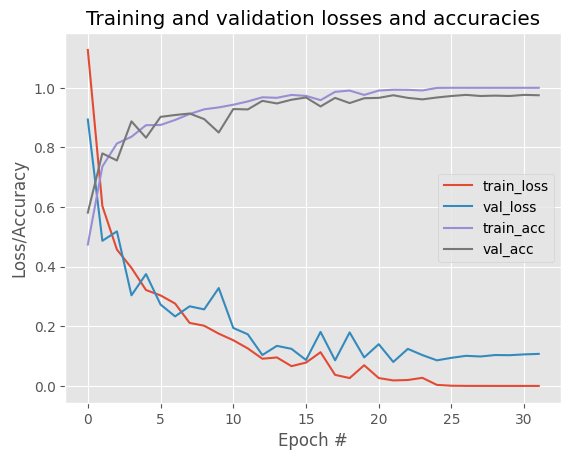

In [45]:
# Showing accuracy y losses graph
show_training_info(cnn_hist)

In [52]:
# Saving training info
save_training_info(cnn_hist, '/content/drive/MyDrive/MBD&CD/MBID14_TFM/DL/Trainings/Train_07/64x64is_3cb_1fl_2ds.pkl')